#  Real Estate Price Prediction - using Advanced Linear Regression Techniques

## Overview

There are several factors that influence the price a buyer is willing to pay for a house. Some are apparent and obvious and some are not. Nevertheless, a rational approach facilitated by machine learning can be very useful in predicting the house price. A large data set with 79 different features (like living area, number of rooms, location etc) along with their prices are provided for residential homes in Ames, Iowa. The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.


Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Statistical Summary](#Statistical_Summary)
    - 3.2 - [Spliting Target Variable](#Spliting_Target_Variable)
    - 3.3 - [Feature Engineering](#Feature_Engineering)
    - 3.4 - [Split dataframe into numeric and categorical](#Split_dataframe)
    - 3.5 - [Reduce Skewness for Numeric Features](#Reduce_Skewness)
    - 3.6 - [Mean Normalization](#Mean_Normalization)
4. **[Missing Data Analysis](#treat_missing_values)**
5. **[Missing Data Treatment](#Missing_Data_Treatment)**
    - 5.1 - [Handling Missing Values in Numerical Columns](#Handling_Numerical_Columns)
    - 5.2 - [Handling Missing Values in Categorical Columns](#Handling_Categorical_Columns)
6. **[Dummy Coding](#dummy_coding)**
7. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 7.1 - [Correlation](#Correlation)
    - 7.2 - [Correlation Plot](#correlation_plot)
8. **[Linear Regression Modeling](#modeling)**
    - 8.1 - [Preparation of datasets](#preparation_of_datasets)
  

<a id='import_packages'></a>
# 1. Import Packages

In [1046]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='load_data'></a>
# 2. Load data
Read the House Price Dataset using pandas.read_csv function into an object(data)

In [1047]:
data = pd.read_csv("D:\WorkPlace_R\DataSets\House Price Dataset.csv")

<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

In [1048]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1049]:
# Checking data size
data.shape

(1460, 81)

<a id='Statistical_Summary'></a>
# 3.1 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables and count, unique, top, freq for categorical variables.

In [1050]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [1051]:
# dataframe with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id='Spliting_Target'></a>
# 3.2 Spliting Target Variable
Here the Target Variable is separated from data and the distribution is checked.

In [1052]:
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\computer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


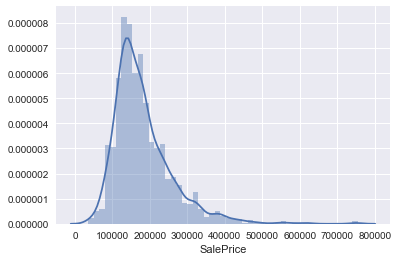

In [1053]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation.

In [1054]:
# Log transformation
import numpy as np
target_log  = np.log(target)

C:\Users\computer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


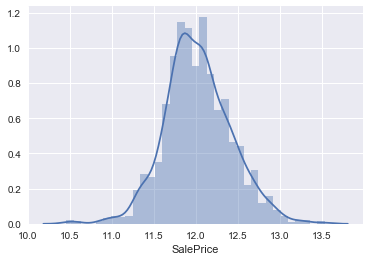

In [1055]:
sns.distplot(target_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000151689947B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000151689C3320>]], dtype=object)

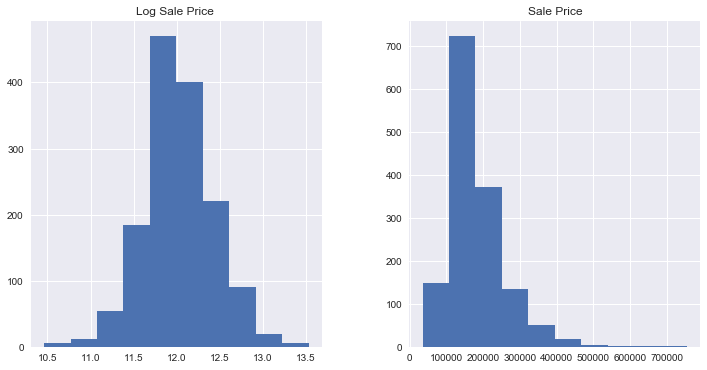

In [1056]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

After using log transformation, the Target variable is normally distributed.

In [1057]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<a id='Features_Engineering'></a>
# 3.3 Feature Engineering

In [1058]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [1059]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


<a id='Split_dataframe'></a>
# 3.4 Split Dataframe into numeric and categorical
Split dataframe into 2 with:

* categorical features
* numerical features

In [1060]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [1061]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [1062]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 3.5 Reduce Skewness for Numeric Features

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Here we are interested in the variables which have skewness more than 0.75


![](https://www.managedfuturesinvesting.com/images/default-source/default-album/skewness---mean-median-mode.jpg?sfvrsn=0)

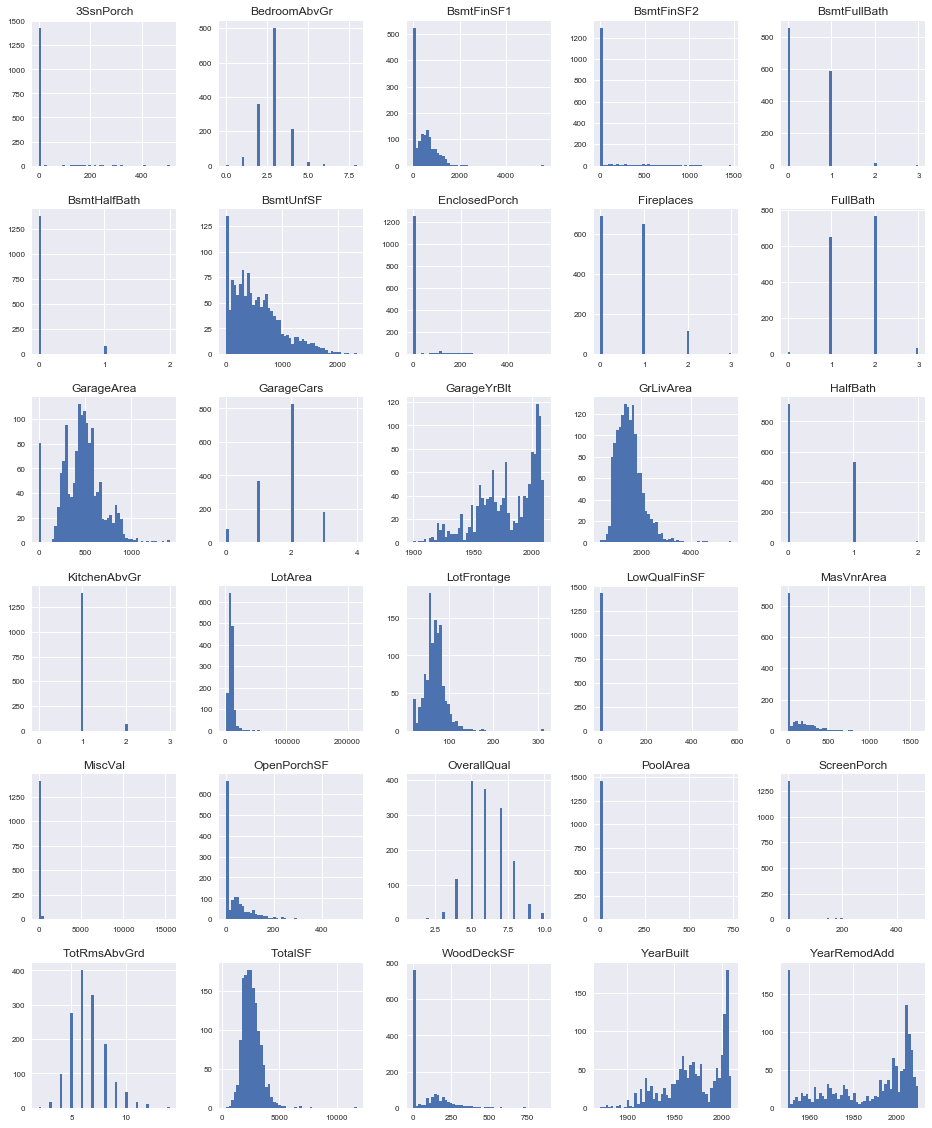

In [1063]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [1064]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [1065]:
# List of variables has skewness more than 0.75
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

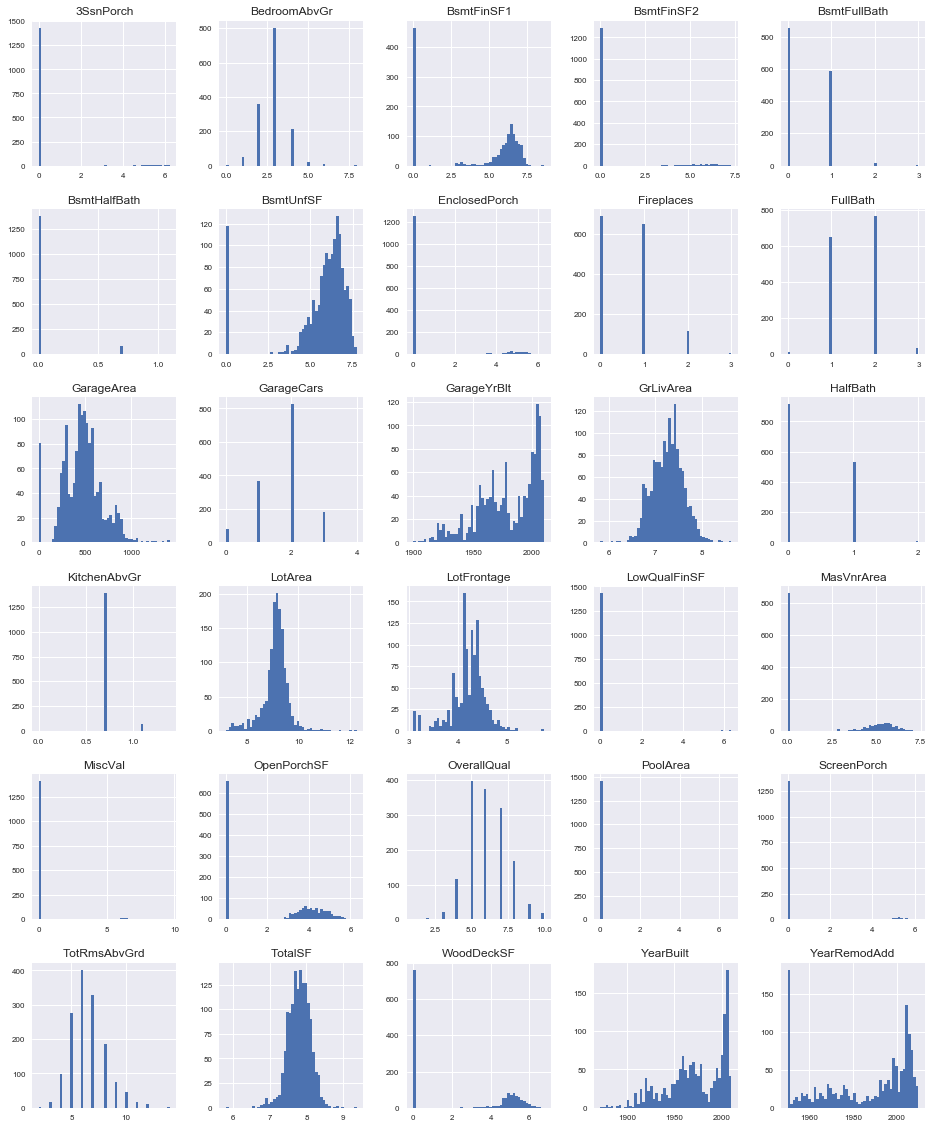

In [1066]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<a id='mean_normalization'></a>
# 3.6 Mean Normalization

In [1070]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-2.368815e-18,2.231377e-18,1.296528e-17,1.126382e-17,-4.828710e-18,1.364840e-16,3.726091e-18,9.429291e-18,2.794568e-18,-1.839757e-17,...,-1.729971e-17,-2.015131e-18,5.976954e-17,-8.550999e-17,-5.957943e-17,5.424219e-17,-2.300291e-18,1.151714e-16,2.054103e-17,1.272527e-18
std,1.302418e-01,1.012732e-01,1.536663e-01,2.188616e-01,3.440901e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,1.868288e-01,1.507792e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-5.665906e-01,-7.193319e-01,-5.810959e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-4.417808e-01,-3.335544e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-1.917808e-01,-9.765877e-02,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,5.821918e-02,4.950538e-03,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,3.122795e-03
75%,7.047235e-02,4.854699e-02,1.000761e-01,2.082043e-01,3.189041e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,5.821918e-02,7.265153e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,4.334094e-01,2.806681e-01,4.189041e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,5.582192e-01,6.664456e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.410050e-01


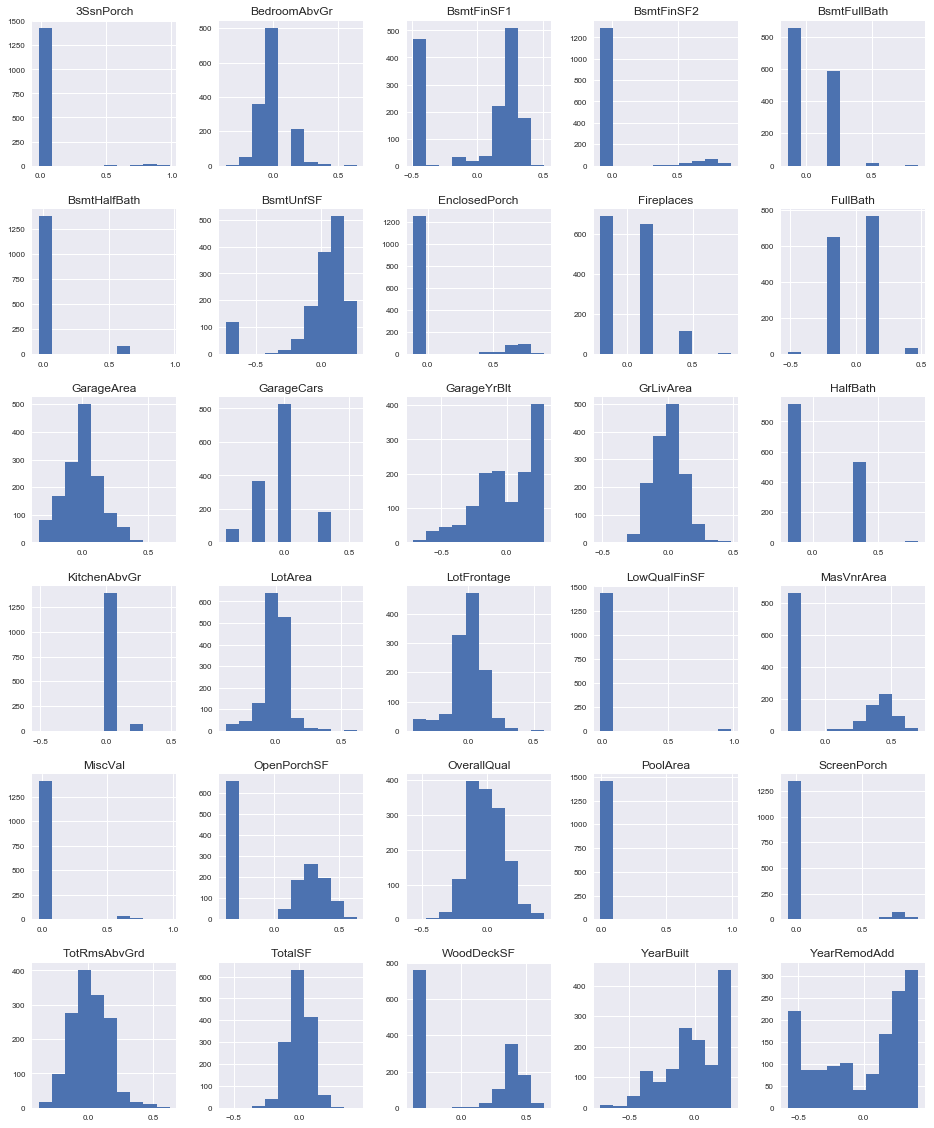

In [1073]:
data_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

After Mean Normalization the data scale will change and it will not affect original data distribution 

<a id='treat_missing_values'></a>

# 4. Missing Data Analysis

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

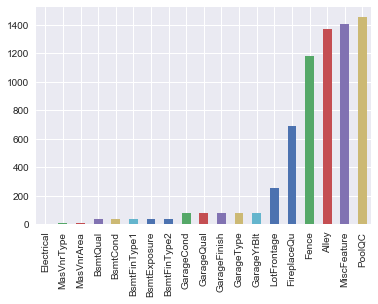

In [933]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [934]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<a id='Missing_Data_Treatment'></a>
# 5. Missing Data Treatment
We may leave the data as it is or do data imputation to replace them. Suppose the number of cases of missing values is extremely small; then we may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then we can drop them.

If there is a larger number of missing values, then it is better to drop those cases (rather than do imputation) and replace them.

# 5.1 Handling Missing Values in Numerical Columns
Here we do data imputation. If the number of missing values is more than 260, we drop those values from the analysis.

In [935]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

# 5.2 Handling Missing Values in Categorical Columns
Here we do data imputation. If the number of missing values is more than 50, we drop the column from the analysis.

In [936]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [937]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


<a id='dummy_coding'></a>
# 6. Dummy Coding for Categorical Variables
Dummy coding is a way of incorporating nominal variables into regression analysis. It allows us to turn categories into something a regression can treat as having a high (1) and low (0) score. Any binary variable can be thought of as having directionality, because if it is higher, it is category 1, but if it is lower, it is category 0. This allows the regression look at directionality by comparing two sides, rather than expecting each unit to correspond with some kind of increase.

In [938]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [939]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [940]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [941]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 31
Categorical features : 246


In [942]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

# 7. Exploratory Data Analysis

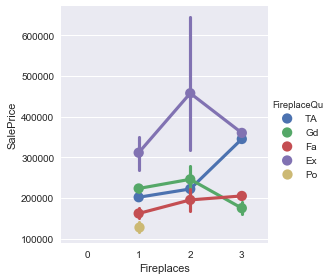

In [1010]:
sns.factorplot("Fireplaces","SalePrice",data=raw_data,hue="FireplaceQu");

If there are two fireplaces, the Sales Price increases.
Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

In [1011]:
# If fireplace is missing that means that house doesn't have a FireplaceQu
FireplaceQu = raw_data["FireplaceQu"].fillna('None')
pd.crosstab(raw_data.Fireplaces, raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


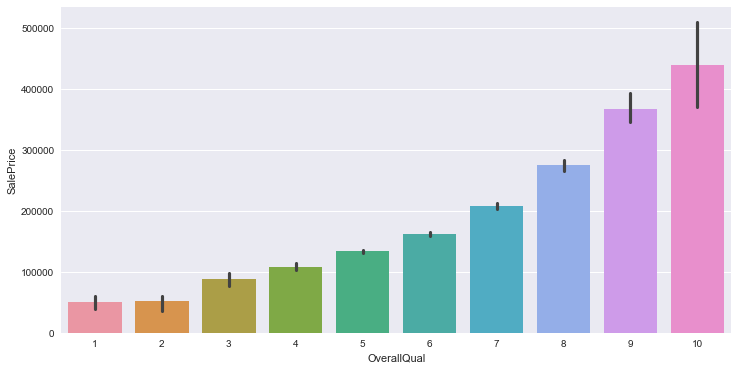

In [1012]:
sns.barplot(raw_data.OverallQual,raw_data.SalePrice)

As we can see, the Sales Price increases with the increase in Overall Quality.

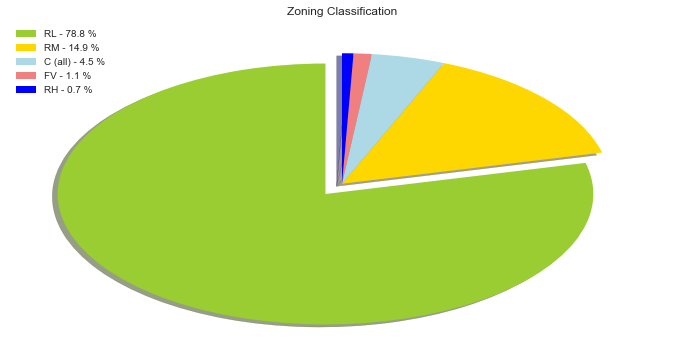

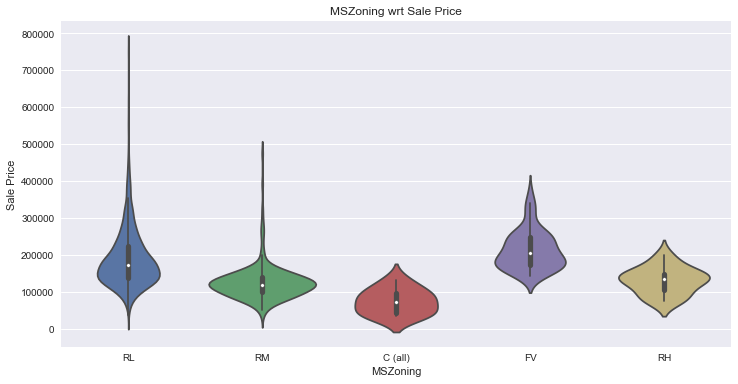

In [1014]:
# MSZoning
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(raw_data.MSZoning,raw_data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

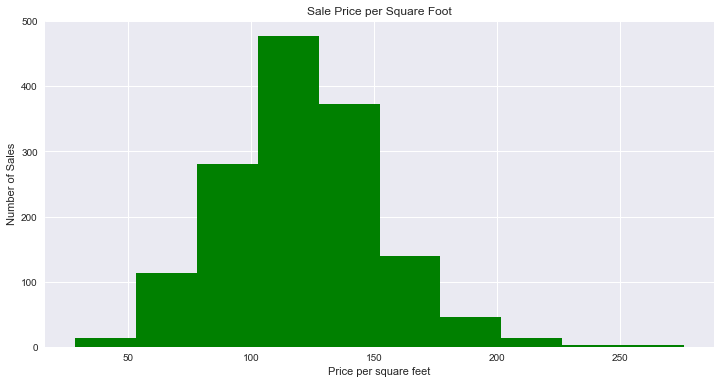

In [1015]:
# SalePrice per Square Foot
SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

Most of the sales happend in 100 to 150 square feet

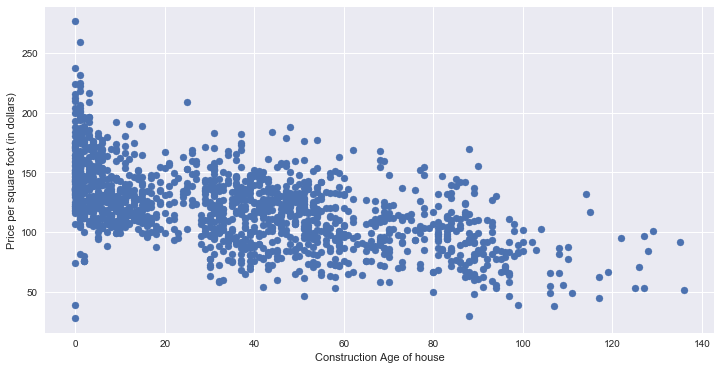

In [1016]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

From the above representation, price of house goes down with its age.

C:\Users\computer\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


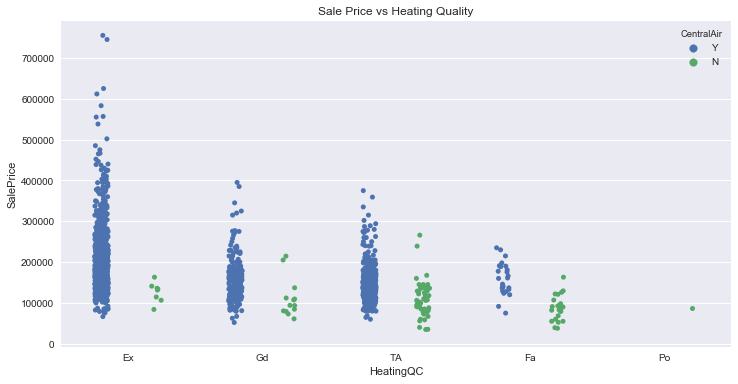

In [1018]:
# Heating and AC arrangements
sns.stripplot(x="HeatingQC", y="SalePrice",data=raw_data,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

Having AC definitely escalates price of house.

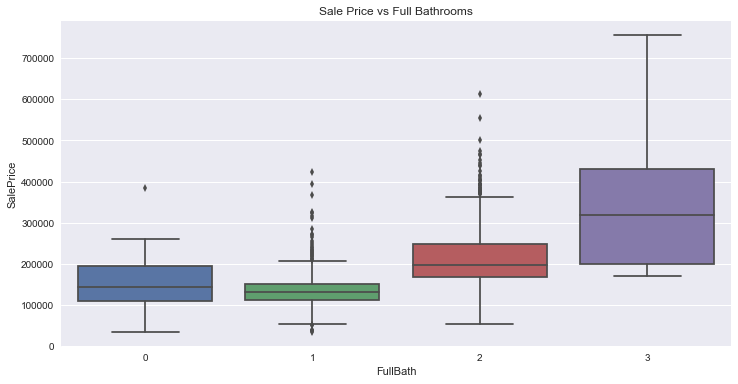

In [1019]:
sns.boxplot(raw_data["FullBath"],raw_data["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

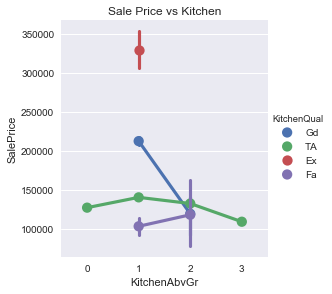

In [1020]:
# Kitchen Quality
sns.factorplot("KitchenAbvGr","SalePrice",data=raw_data,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

Having one Kitchen of Excellent quality hikes house price.

# 7.1 Correlation

In [945]:
# Check Correlation
data_num.corr()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
Id,1.000000,-0.018167,-0.017483,-0.028365,-0.012713,-0.021998,-0.030614,-0.012806,-0.005280,-0.008539,...,0.016570,0.017634,-0.048039,0.006396,-0.005415,-0.039543,0.004489,0.055796,-0.038611,-0.000938
LotFrontage,-0.018167,1.000000,0.646757,0.207340,0.085230,0.061083,0.114949,0.061908,0.032854,0.106388,...,0.273036,0.317929,0.057052,0.132994,-0.019167,0.055061,0.044815,0.120014,0.025451,0.372405
LotArea,-0.017483,0.646757,1.000000,0.178220,0.021943,0.027672,0.070586,0.096966,0.084312,0.047510,...,0.272010,0.322048,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,-0.028365,0.207340,0.178220,1.000000,0.572323,0.550684,0.413760,0.054199,-0.101469,0.268446,...,0.600671,0.562022,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.678565
YearBuilt,-0.012713,0.085230,0.021943,0.572323,1.000000,0.592855,0.412414,0.151209,-0.068793,0.090576,...,0.537850,0.478954,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.366477
YearRemodAdd,-0.021998,0.061083,0.027672,0.550684,0.592855,1.000000,0.224582,0.012105,-0.102425,0.167086,...,0.420622,0.371600,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.362181
MasVnrArea,-0.030614,0.114949,0.070586,0.413760,0.412414,0.224582,1.000000,0.187073,-0.063038,0.093676,...,0.389981,0.370968,0.161553,0.209857,-0.186104,0.047053,0.037424,0.005363,-0.054456,0.382008
BsmtFinSF1,-0.012806,0.061908,0.096966,0.054199,0.151209,0.012105,0.187073,1.000000,0.185051,-0.265488,...,0.070302,0.117933,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,-0.005280,0.032854,0.084312,-0.101469,-0.068793,-0.102425,-0.063038,0.185051,1.000000,-0.272666,...,-0.053164,-0.018257,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,-0.008539,0.106388,0.047510,0.268446,0.090576,0.167086,0.093676,-0.265488,-0.272666,1.000000,...,0.146919,0.113877,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397


# 7.2 Correlation Plot

Text(0.5,1,'Correlation between features')

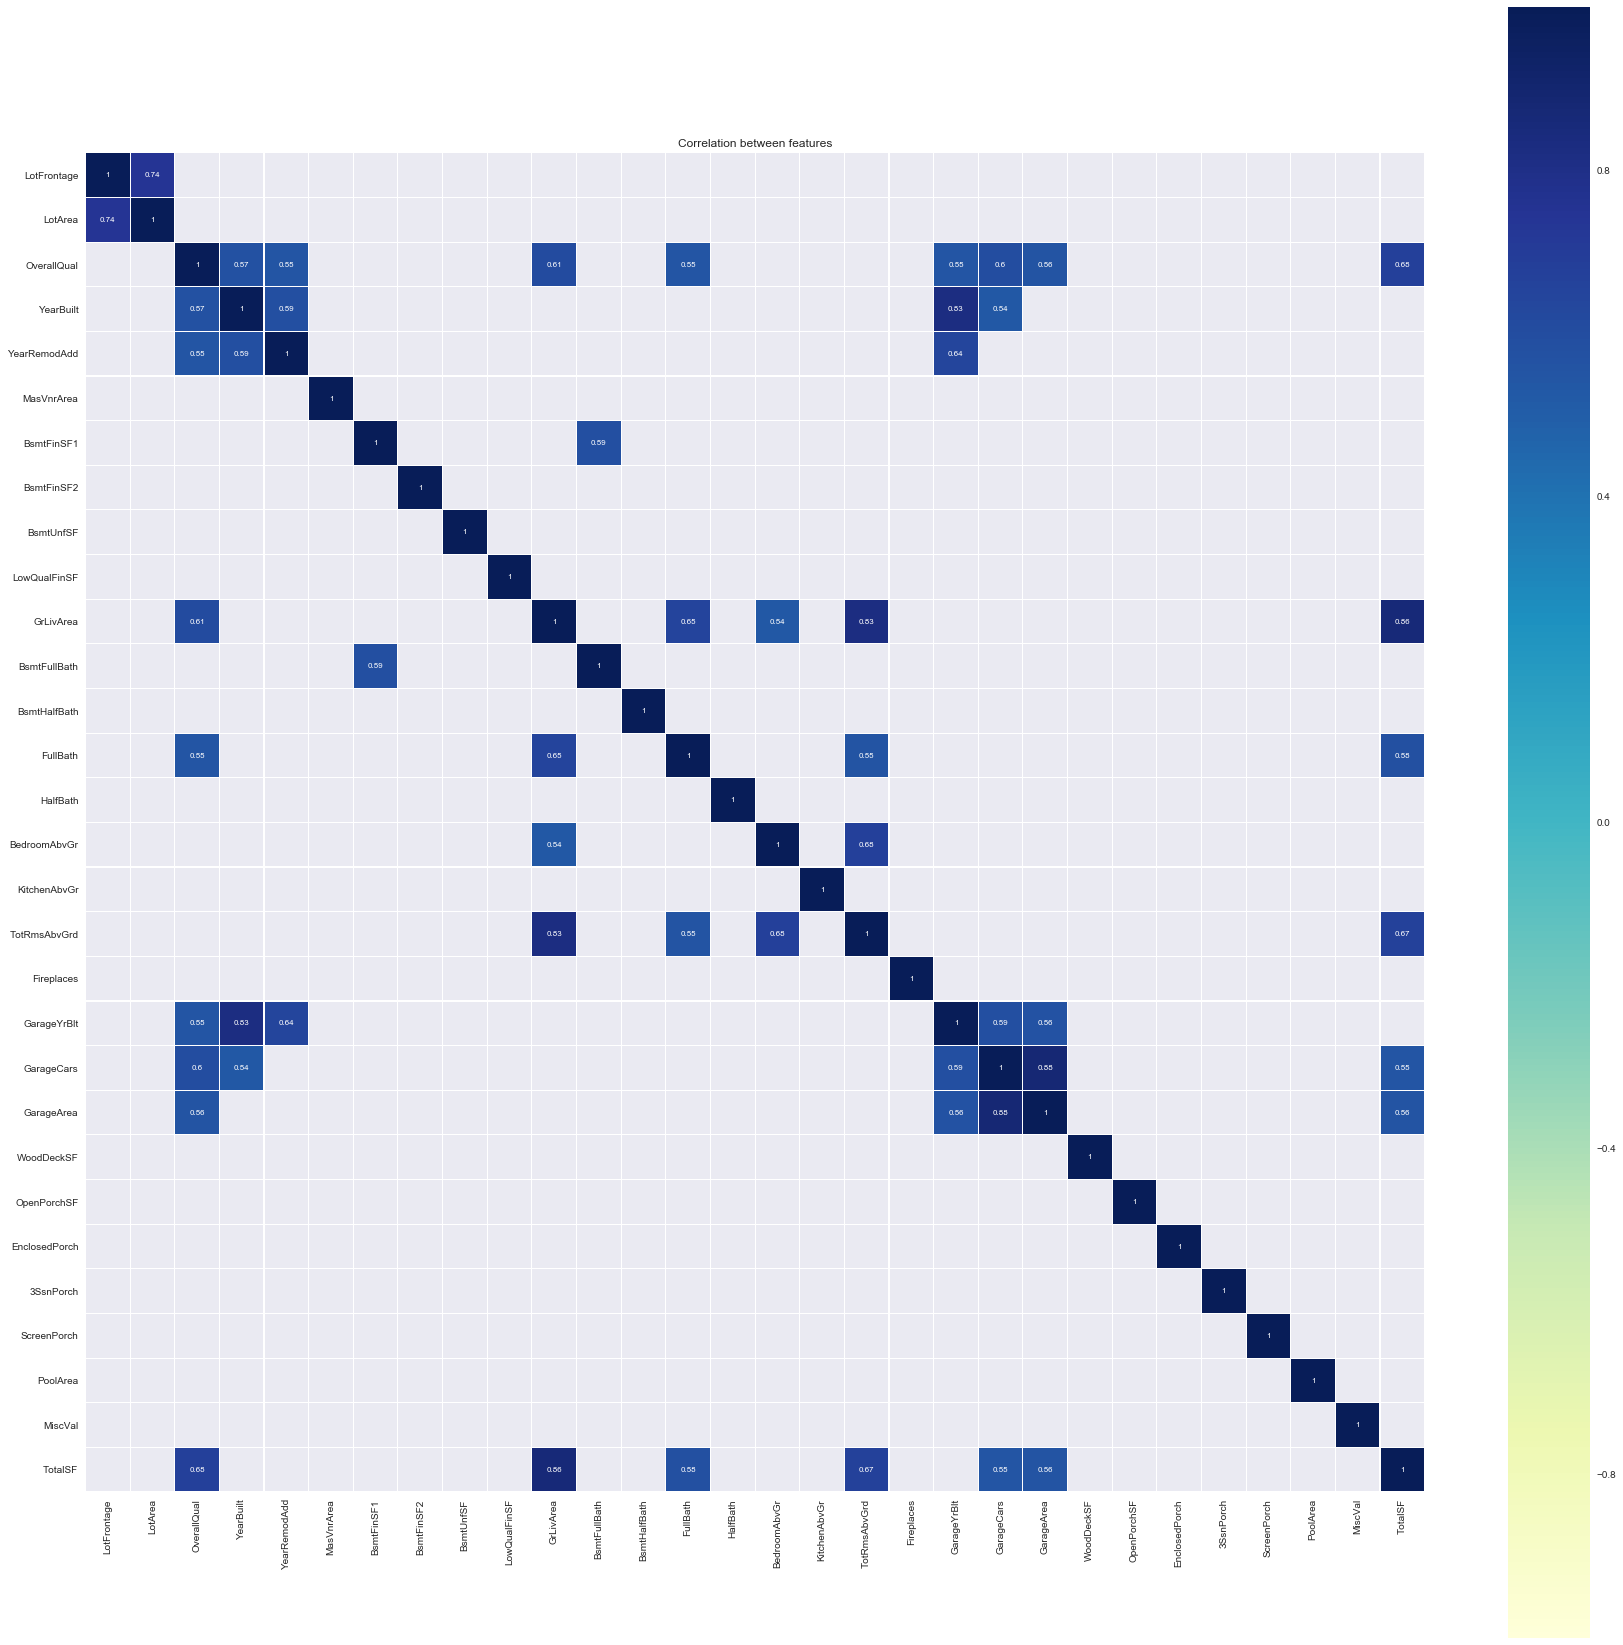

In [1109]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

As we can see above there are few features which show high multicollinearity from heatmap. Dark Blue squares on diagonal line has high multicollinearity 

# 8. Linear Regression Modeling

# 8.1 Preparation of Datasets
Split the dataset into Train & Test

In [947]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 277)
x_test  (438, 277)
y_train  (1022,)
y_test  (438,)


# 8.2 Building a Linear Regression Base Model

In [948]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [949]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:25:33   Log-Likelihood:                 1107.7
No. Observations:                1022   AIC:                            -1683.
Df Residuals:                     756   BIC:                            -372.1
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                       -0.0241      0.012     -2.019      0.044      -0.048      -0.001
LotFrontage               0.0760      0.051      1.481      0.139      -0.025       0.177
LotArea                   0.5298      0.079      6.705      0.000       0.375       0.685
OverallQual               0.3003      0.050      6.007      0.000       0.202       0.398
YearBuilt                 0.2447      0.065      3.744      0.000       0.116       0.373
YearRemodAdd              0.0465      0.019      2.476      0.013       0.010       0.083
MasVnrArea                0.0532      0.047      1.131      0.259      -0.039       0.146
BsmtFinSF1                0.0963      0.051      1.878      0.061      -0.004       0.197
BsmtFinSF2                0.0031      0.077      0.040      0.968      -0.147       0.153
BsmtUnfSF                -0.0365      0.026     -1.420      0.156      -0.087       0.014
LowQualFinSF              0.0097      0.040      0.244      0.807      -0.068       0.088
GrLivArea                 0.5945      0.179      3.318      0.001       0.243       0.946
BsmtFullBath              0.0877      0.031      2.860      0.004       0.028       0.148
BsmtHalfBath              0.0424      0.027      1.591      0.112      -0.010       0.095
FullBath                  0.1111      0.036      3.095      0.002       0.041       0.182
HalfBath                  0.0608      0.024      2.528      0.012       0.014       0.108
BedroomAbvGr             -0.0683      0.062     -1.108      0.268      -0.189       0.053
KitchenAbvGr             -0.1893      0.115     -1.642      0.101      -0.416       0.037
TotRmsAbvGrd              0.0414      0.059      0.699      0.485      -0.075       0.158
Fireplaces                0.0570      0.036      1.571      0.117      -0.014       0.128
GarageYrBlt              -0.0136      0.038     -0.363      0.717      -0.087       0.060
GarageCars                0.0141      0.052      0.274      0.784      -0.087       0.115
GarageArea                0.1986      0.063      3.152      0.002       0.075       0.322
WoodDeckSF                0.0375      0.010      3.625      0.000       0.017       0.058
OpenPorchSF               0.0082      0.013      0.651      0.515      -0.017       0.033
EnclosedPorch             0.0099      0.015      0.644      0.520      -0.020       0.040
3SsnPorch                -0.0051      0.034     -0.153      0.879      -0.071       0.061
ScreenPorch               0.0374      0.015      2.413      0.016       0.007       0.068
PoolArea                 -0.0234      0.164     -0.143      0.887      -0.345       0.299
MiscVal                   0.0331      0.091      0.362      0.718      -0.147       0.213
TotalSF                   0.9518      0.214      4.438      0.000       0.531       1.373
MSSubClass_160         

In [979]:
from IPython.display import Image

# Model Evaluation Metrics for Regression

Metrics can we used for regression problems are

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
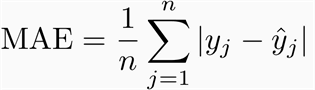

 
Mean Squared Error (MSE) is the mean of the squared errors:
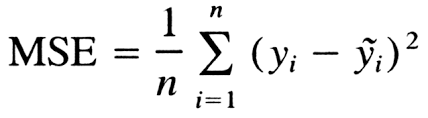
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
![](https://cdn-images-1.medium.com/max/1600/1*9hQVcasuwx5ddq_s3MFCyw.gif)



In [950]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [951]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [952]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958527,0.943989,0.464362


# 8.3 Building Model with Constant

In [953]:
df_constant = sm.add_constant(newdata)

In [954]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state=0)

In [955]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model2 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 

In [956]:
# Printing Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.944     
Dependent Variable:   SalePrice        AIC:                -1683.3983
Date:                 2018-07-25 13:25 BIC:                -372.1468 
No. Observations:     1022             Log-Likelihood:     1107.7    
Df Model:             265              F-statistic:        65.93     
Df Residuals:         756              Prob (F-statistic): 0.00      
R-squared:            0.959            Scale:              0.0090580 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  9.3135   0.2042 45.6027 0.0000  8.9126  9.7144
Id                    -0.0241   0.0119 -2.0193 0.0438 -0.0475 -0.0007
LotFrontage            0.0760   0.0513  1.4807 0.1391 -0.0247  0.1767
LotArea                0.5298   0.0790  6.7045 0.0000  0.3747  0.6849
OverallQual            0.3003   0.0500  6.0067 0.0000  0.2022  0.3985
YearBuilt              0.2447   0.0653  3.7445 0.0002  0.1164  0.3729
YearRemodAdd           0.0465   0.0188  2.4764 0.0135  0.0096  0.0834
MasVnrArea             0.0532   0.0470  1.1307 0.2586 -0.0392  0.1455
BsmtFinSF1             0.0963   0.0513  1.8783 0.0607 -0.0043  0.1969
BsmtFinSF2             0.0031   0.0766  0.0400 0.9681 -0.1472  0.1533
BsmtUnfSF             -0.0365   0.0257 -1.4197 0.1561 -0.0871  0.0140
LowQualFinSF           0.0097   0.0397  0.2438 0.8074 -0.0683  0.0877
GrLivArea              0.5945   0.1792  3.3175 0.0010  0.2427  0.9462
BsmtFullBath           0.0877   0.0307  2.8602 0.0044  0.0275  0.1479
BsmtHalfBath           0.0424   0.0266  1.5907 0.1121 -0.0099  0.0947
FullBath               0.1111   0.0359  3.0949 0.0020  0.0406  0.1815
HalfBath               0.0608   0.0241  2.5283 0.0117  0.0136  0.1080
BedroomAbvGr          -0.0683   0.0616 -1.1083 0.2681 -0.1892  0.0526
KitchenAbvGr          -0.1893   0.1153 -1.6420 0.1010 -0.4156  0.0370
TotRmsAbvGrd           0.0414   0.0592  0.6992 0.4847 -0.0748  0.1576
Fireplaces             0.0570   0.0362  1.5713 0.1165 -0.0142  0.1281
GarageYrBlt           -0.0136   0.0376 -0.3629 0.7168 -0.0875  0.0602
GarageCars             0.0141   0.0515  0.2744 0.7839 -0.0870  0.1153
GarageArea             0.1986   0.0630  3.1518 0.0017  0.0749  0.3224
WoodDeckSF             0.0375   0.0103  3.6249 0.0003  0.0172  0.0578
OpenPorchSF            0.0082   0.0127  0.6509 0.5153 -0.0166  0.0331
EnclosedPorch          0.0099   0.0153  0.6441 0.5197 -0.0202  0.0399
3SsnPorch             -0.0051   0.0337 -0.1529 0.8786 -0.0712  0.0609
ScreenPorch            0.0374   0.0155  2.4127 0.0161  0.0070  0.0678
PoolArea              -0.0234   0.1641 -0.1427 0.8866 -0.3455  0.2987
MiscVal                0.0331   0.0915  0.3618 0.7176 -0.1465  0.2127
TotalSF                0.9518   0.2145  4.4377 0.0000  0.5308  1.3729
MSSubClass_160        -0.0687   0.0580 -1.1852 0.2363 -0.1826  0.0451
MSSubClass_180         0.0609   0.0787  0.7738 0.4393 -0.0935  0.2153
MSSubClass_190        -0.0235   0.1538 -0.1526 0.8788 -0.3253  0.2784
MSSubClass_20         -0.0455   0.0675 -0.6735 0.5008 -0.1781  0.0871
MSSubClass_30         -0.0968   0.0718 -1.3484 0.1779 -0.2376  0.0441
MSSubClass_40          0.0152   0.1188  0.1278 0.8983 -0.2181  0.2485
MSSubClass_45         -0.6041   0.1738 -3.4757 0.0005 -0.9454 -0.2629
MSSubClass_50         -0.0974   0.0874 -1.1145 0.2654 -0.2690  0.0742
MSSubClass_60         -0.0696   0.0832 -0.8366 0.4031 -0.2329  0.0937
MSSubClass_70         -0.0448   0.0843 -0.5307 0.5958 -0.2103  0.1208
MSSubClass_75         -0.1197   0.1128 -1.0609 0.2891 -0.3412  0.1018
MSSubClass_80         -0.0783   0.1013 -0.7735 0.4394 -0.2772  0.1205
MSSubClass_85         -0.0145   0.0927 -0.1563 0.8

In [957]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)

tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model with Constant,0.958527,0.943989,0.167912


# Multicollinearity
In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.
![](https://www.displayr.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-06-at-10.32.14-am.png)
A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

## 8.4 Calculating Variance Inflation Factor(VIF)

In [958]:
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor


C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const 0.0
Id 1.342
LotFrontage 3.903
LotArea 7.1
OverallQual 6.414
YearBuilt 23.111
YearRemodAdd 4.651
MasVnrArea 31.586
BsmtFinSF1 35.577
BsmtFinSF2 43.956
BsmtUnfSF 4.086
LowQualFinSF 2.479
GrLivArea 50.169
BsmtFullBath 3.124
BsmtHalfBath 1.723
FullBath 4.734
HalfBath 4.046
BedroomAbvGr 4.31
KitchenAbvGr 6.251
TotRmsAbvGrd 7.162
Fireplaces 6.65
GarageYrBlt 7.786
GarageCars 10.078
GarageArea 9.708
WoodDeckSF 1.797
OpenPorchSF 2.119
EnclosedPorch 2.075
3SsnPorch 1.451
ScreenPorch 1.459
PoolArea 8.353
MiscVal 18.066
TotalSF 38.985
MSSubClass_160 16.981
MSSubClass_180 2.722
MSSubClass_190 53.698
MSSubClass_20 119.798
MSSubClass_30 25.49
MSSubClass_40 4.663
MSSubClass_45 36.296
MSSubClass_50 75.425
MSSubClass_60 129.749
MSSubClass_70 33.777
MSSubClass_75 13.917
MSSubClass_80 39.333
MSSubClass_85 12.166
MSSubClass_90 inf


C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


MSZoning_FV 17.048
MSZoning_RH 5.889
MSZoning_RL 54.661
MSZoning_RM 35.577
Street_Pave 2.077
Alley_Pave 2.547
LotShape_IR2 1.539
LotShape_IR3 1.544
LotShape_Reg 1.903
LandContour_HLS 2.82
LandContour_Low 3.659
LandContour_Lvl 4.557
Utilities_NoSeWa 2.086
LotConfig_CulDSac 2.134
LotConfig_FR2 1.472
LotConfig_FR3 2.507
LotConfig_Inside 2.072
LandSlope_Mod 2.353
LandSlope_Sev 3.121
Neighborhood_Blueste 1.862
Neighborhood_BrDale 4.633
Neighborhood_BrkSide 12.846
Neighborhood_ClearCr 6.766
Neighborhood_CollgCr 17.828
Neighborhood_Crawfor 9.428
Neighborhood_Edwards 15.5
Neighborhood_Gilbert 10.459
Neighborhood_IDOTRR 10.317
Neighborhood_MeadowV 5.516
Neighborhood_Mitchel 8.612
Neighborhood_NAmes 29.1
Neighborhood_NPkVill 3.426
Neighborhood_NWAmes 11.317
Neighborhood_NoRidge 6.939
Neighborhood_NridgHt 9.957
Neighborhood_OldTown 23.253
Neighborhood_SWISU 5.713
Neighborhood_Sawyer 13.541
Neighborhood_SawyerW 9.293
Neighborhood_Somerst 13.828
Neighborhood_StoneBr 3.95
Neighborhood_Timber 6.686
N

C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosN 3.425
Condition2_RRAe 7.566
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.404
BldgType_Duplex inf
BldgType_Twnhs 16.356
BldgType_TwnhsE 37.644
HouseStyle_1.5Unf 35.376
HouseStyle_1Story 80.4
HouseStyle_2.5Fin 4.488
HouseStyle_2.5Unf 7.016
HouseStyle_2Story 54.865
HouseStyle_SFoyer 12.395
HouseStyle_SLvl 25.835
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gable 134.77
RoofStyle_Gambrel 7.836
RoofStyle_Hip 124.463
RoofStyle_Mansard 6.389
RoofStyle_Shed 7.24
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.923
Exterior1st_BrkFace 21.489
Exterior1st_CBlock inf
Exterior1st_CemntBd 47.505
Exterior1st_HdBoard 84.65
Exterior1st_ImStucc 1.897
Exterior1st_MetalSd 111.636
Exterior1st_Plywood 51.111
Exterior1st_Stone 3.344
Ex

Removing variable has  threshold value of VIF above 100 

#### Removing variable having VIF above 100


In [959]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train1 if x not in vif_100]
# print(to_keep)
x_train2 = x_train1[to_keep]
x_train2.head()

,const,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,1.0,-0.456134,0.000000,0.006840,0.100076,0.186465,0.218904,0.572034,0.275153,-0.089825,...,0,0,0,0,1,0,0,0,1,0
682,1.0,-0.032557,0.000000,-0.223669,-0.011035,0.179219,0.202237,-0.288945,0.310472,-0.089825,...,0,0,0,0,1,0,0,0,1,0
960,1.0,0.157985,-0.103554,-0.044634,-0.122146,-0.096144,0.385571,-0.288945,0.268223,-0.089825,...,0,0,0,0,1,0,0,0,1,0
1384,1.0,0.448595,-0.036201,0.000150,-0.011035,-0.233825,-0.581096,-0.288945,0.126559,-0.089825,...,0,0,0,0,1,0,0,0,1,0
1100,1.0,0.253941,-0.036201,-0.014654,-0.455479,-0.371506,-0.581096,-0.288945,0.167111,-0.089825,...,0,0,0,0,1,0,0,0,1,0


### 8.4.1 Building Model after removing VIF above 100

In [960]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model3 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.46
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:26:20   Log-Likelihood:                 1096.2
No. Observations:                1022   AIC:                            -1678.
Df Residuals:                     765   BIC:                            -411.4
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.6594      0.212     50.311      0.000      10.243      11.075
Id                       -0.0224      0.012     -1.876      0.061      -0.046       0.001
LotFrontage               0.0970      0.051      1.896      0.058      -0.003       0.197
LotArea                   0.5045      0.076      6.651      0.000       0.356       0.653
OverallQual               0.3160      0.050      6.380      0.000       0.219       0.413
YearBuilt                 0.2287      0.065      3.538      0.000       0.102       0.356
YearRemodAdd              0.0462      0.019      2.490      0.013       0.010       0.083
MasVnrArea                0.0637      0.047      1.357      0.175      -0.028       0.156
BsmtFinSF1                0.1080      0.051      2.111      0.035       0.008       0.209
BsmtFinSF2               -0.0072      0.076     -0.094      0.925      -0.157       0.142
BsmtUnfSF                -0.0387      0.026     -1.503      0.133      -0.089       0.012
LowQualFinSF              0.0269      0.040      0.679      0.498      -0.051       0.105
GrLivArea                 0.6034      0.179      3.374      0.001       0.252       0.955
BsmtFullBath              0.0877      0.031      2.866      0.004       0.028       0.148
BsmtHalfBath              0.0396      0.027      1.488      0.137      -0.013       0.092
FullBath                  0.1045      0.036      2.910      0.004       0.034       0.175
HalfBath                  0.0574      0.024      2.427      0.015       0.011       0.104
BedroomAbvGr             -0.0771      0.061     -1.255      0.210      -0.198       0.044
KitchenAbvGr             -0.1812      0.112     -1.615      0.107      -0.401       0.039
TotRmsAbvGrd              0.0692      0.059      1.172      0.242      -0.047       0.185
Fireplaces                0.0478      0.036      1.322      0.186      -0.023       0.119
GarageYrBlt               0.0065      0.037      0.177      0.859      -0.065       0.078
GarageCars                0.0095      0.051      0.185      0.853      -0.091       0.110
GarageArea                0.1511      0.061      2.460      0.014       0.031       0.272
WoodDeckSF                0.0345      0.010      3.338      0.001       0.014       0.055
OpenPorchSF               0.0080      0.013      0.634      0.526      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.625      0.532      -0.020       0.039
3SsnPorch                -0.0117      0.034     -0.347      0.729      -0.078       0.054
ScreenPorch               0.0445      0.015      2.897      0.004       0.014       0.075
PoolArea                 -0.0896      0.161     -0.556      0.579      -0.406       0.227
MiscVal                   0.0411      0.092      0.450      0.653      -0.138       0.221
TotalSF                

In [961]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_test1 if x not in vif_100]
# print(to_keep)
x_test2 = x_test1[to_keep]
x_test2.head()

,const,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,1.0,-0.137423,0.000000,0.251185,-0.011035,-0.103390,-0.164429,0.000000,0.333029,-0.089825,...,0,0,0,0,1,0,1,0,0,0
491,1.0,-0.163468,0.065799,0.009226,-0.011035,-0.219332,-0.581096,-0.288945,0.205091,0.610792,...,0,0,0,0,1,0,0,0,1,0
459,1.0,-0.185401,0.000000,-0.049919,-0.122146,-0.154115,-0.581096,0.400582,0.115299,-0.089825,...,0,0,0,0,1,0,0,0,1,0
279,1.0,-0.308773,0.084153,0.019570,0.100076,0.041538,-0.131096,0.484095,0.201895,-0.089825,...,0,0,0,0,1,0,0,0,1,0
655,1.0,-0.051062,-0.419834,-0.329602,-0.011035,-0.001941,-0.231096,0.516844,-0.489636,-0.089825,...,0,0,0,0,1,0,0,1,0,0


In [962]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 100,0.957579,0.943383,0.172947


#### Checking variable having VIF above 10

In [963]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor


C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const 0.0
Id 1.325
LotFrontage 3.834
LotArea 6.474
OverallQual 6.23
YearBuilt 22.381
YearRemodAdd 4.486
MasVnrArea 31.1
BsmtFinSF1 35.07
BsmtFinSF2 42.99
BsmtUnfSF 4.055
LowQualFinSF 2.435
GrLivArea 49.44
BsmtFullBath 3.076
BsmtHalfBath 1.699
FullBath 4.691
HalfBath 3.869
BedroomAbvGr 4.241
KitchenAbvGr 5.859
TotRmsAbvGrd 7.043
Fireplaces 6.545
GarageYrBlt 7.296
GarageCars 9.844
GarageArea 9.122
WoodDeckSF 1.772
OpenPorchSF 2.073
EnclosedPorch 2.027
3SsnPorch 1.437
ScreenPorch 1.417
PoolArea 7.971
MiscVal 17.874
TotalSF 38.758
MSSubClass_160 5.907
MSSubClass_180 2.651
MSSubClass_190 41.496
MSSubClass_30 3.348
MSSubClass_40 3.173
MSSubClass_45 30.276
MSSubClass_50 22.275
MSSubClass_70 4.197
MSSubClass_75 7.433
MSSubClass_80 19.285
MSSubClass_85 5.626
MSSubClass_90 inf


C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


MSZoning_FV 16.836
MSZoning_RH 5.766
MSZoning_RL 54.011
MSZoning_RM 35.153
Street_Pave 1.994
Alley_Pave 2.528
LotShape_IR2 1.485
LotShape_IR3 1.536
LotShape_Reg 1.886
LandContour_HLS 2.759
LandContour_Low 3.481
LandContour_Lvl 4.458
Utilities_NoSeWa 2.008
LotConfig_CulDSac 2.095
LotConfig_FR2 1.458
LotConfig_FR3 2.482
LotConfig_Inside 2.011
LandSlope_Mod 2.322
LandSlope_Sev 3.093
Neighborhood_Blueste 1.856
Neighborhood_BrDale 4.607
Neighborhood_BrkSide 12.711
Neighborhood_ClearCr 6.38
Neighborhood_CollgCr 17.704
Neighborhood_Crawfor 9.305
Neighborhood_Edwards 15.316
Neighborhood_Gilbert 10.374
Neighborhood_IDOTRR 10.173
Neighborhood_MeadowV 5.458
Neighborhood_Mitchel 8.508
Neighborhood_NAmes 28.801
Neighborhood_NPkVill 3.405
Neighborhood_NWAmes 11.226
Neighborhood_NoRidge 6.903
Neighborhood_NridgHt 9.826
Neighborhood_OldTown 23.038
Neighborhood_SWISU 5.689
Neighborhood_Sawyer 13.456
Neighborhood_SawyerW 9.201
Neighborhood_Somerst 13.665
Neighborhood_StoneBr 3.873
Neighborhood_Timber 6.

C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosN 3.309
Condition2_RRAe 7.473
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.021
BldgType_Duplex inf
BldgType_Twnhs 3.919
BldgType_TwnhsE 4.057
HouseStyle_1.5Unf 32.622
HouseStyle_1Story 56.521
HouseStyle_2.5Fin 4.327
HouseStyle_2.5Unf 6.601
HouseStyle_2Story 48.129
HouseStyle_SFoyer 10.984
HouseStyle_SLvl 25.254
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.85
RoofStyle_Mansard 1.824
RoofStyle_Shed 5.804
RoofMatl_Membran nan
RoofMatl_Metal 1.563
RoofMatl_Roll 1.31
RoofMatl_Tar&Grv 1.887
RoofMatl_WdShake 2.499
RoofMatl_WdShngl 1.375
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.428
Exterior1st_BrkFace 6.085
Exterior1st_CBlock inf
Exterior1st_CemntBd 30.033
Exterior1st_HdBoard 17.486
Exterior1st_ImStucc 1.4
Exterior1st_Plywood 10.46
Exterior1st_Stone 2.24
Exterior1st_Stucco 5.659
Exterior1st_Wd Sdng 13.567
Exterior1st_WdShing 3.356
Exterior2nd_A

### Below are the variable having above 10 VIF threshold

In [964]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_train2 if x not in VIF_10]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,Id,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,-0.456134,0.000000,0.006840,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,0,0,1
682,1.0,-0.032557,0.000000,-0.223669,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,0,0,1
960,1.0,0.157985,-0.103554,-0.044634,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,0.448595,-0.036201,0.000150,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,0.253941,-0.036201,-0.014654,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,...,0,0,0,0,0,1,0,0,0,1


### 8.4.2 Building Model after removing VIF above 10

In [965]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     50.59
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:26:58   Log-Likelihood:                 780.75
No. Observations:                1022   AIC:                            -1175.
Df Residuals:                     829   BIC:                            -224.1
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.4990      0.097    108.707      0.000      10.309      10.689
Id                       -0.0130      0.015     -0.879      0.380      -0.042       0.016
LotFrontage               0.1636      0.063      2.594      0.010       0.040       0.287
LotArea                   0.4557      0.087      5.260      0.000       0.286       0.626
OverallQual               0.7137      0.054     13.143      0.000       0.607       0.820
YearRemodAdd              0.0917      0.022      4.252      0.000       0.049       0.134
BsmtUnfSF                 0.0193      0.028      0.696      0.487      -0.035       0.074
LowQualFinSF             -0.0603      0.047     -1.295      0.196      -0.152       0.031
BsmtFullBath              0.1867      0.034      5.563      0.000       0.121       0.253
BsmtHalfBath              0.0681      0.033      2.085      0.037       0.004       0.132
FullBath                  0.2577      0.040      6.499      0.000       0.180       0.335
HalfBath                  0.0815      0.022      3.748      0.000       0.039       0.124
BedroomAbvGr              0.0276      0.074      0.374      0.708      -0.117       0.173
KitchenAbvGr             -0.2277      0.112     -2.032      0.042      -0.448      -0.008
TotRmsAbvGrd              0.3722      0.063      5.934      0.000       0.249       0.495
Fireplaces                0.1581      0.045      3.529      0.000       0.070       0.246
GarageCars                0.0798      0.060      1.334      0.183      -0.038       0.197
GarageArea                0.3148      0.073      4.319      0.000       0.172       0.458
WoodDeckSF                0.0443      0.013      3.400      0.001       0.019       0.070
OpenPorchSF               0.0337      0.015      2.223      0.027       0.004       0.063
EnclosedPorch            -0.0360      0.018     -1.976      0.048      -0.072      -0.000
3SsnPorch                 0.0094      0.043      0.222      0.824      -0.074       0.093
ScreenPorch               0.0558      0.019      2.874      0.004       0.018       0.094
PoolArea                 -0.0740      0.193     -0.384      0.701      -0.453       0.305
MSSubClass_160           -0.0353      0.039     -0.910      0.363      -0.111       0.041
MSSubClass_180           -0.0501      0.078     -0.644      0.520      -0.203       0.103
MSSubClass_30            -0.1049      0.026     -4.112      0.000      -0.155      -0.055
MSSubClass_40             0.1281      0.115      1.111      0.267      -0.098       0.354
MSSubClass_70            -0.0103      0.027     -0.380      0.704      -0.063       0.043
MSSubClass_75             0.0808      0.093      0.872      0.384      -0.101       0.263
MSSubClass_85            -0.0159      0.041     -0.390      0.697      -0.096       0.064
MSZoning_RH            

In [966]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_test2 if x not in VIF_10]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,Id,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,-0.137423,0.000000,0.251185,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,1,0,0
491,1.0,-0.163468,0.065799,0.009226,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,0,0,1
459,1.0,-0.185401,0.000000,-0.049919,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,...,0,0,0,0,0,1,0,0,0,1
279,1.0,-0.308773,0.084153,0.019570,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.051062,-0.419834,-0.329602,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,...,0,0,0,0,0,1,0,0,1,0


In [967]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': " LRM after removing VIF above 10",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 10,0.921361,0.903147,0.17904


# Checking variable having VIF above 5

In [968]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0


C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Id 1.193
LotFrontage 3.41
LotArea 4.937
OverallQual 4.376
YearRemodAdd 3.542
BsmtUnfSF 2.753
LowQualFinSF 1.965
BsmtFullBath 2.164
BsmtHalfBath 1.498
FullBath 3.34
HalfBath 1.914
BedroomAbvGr 3.583
KitchenAbvGr 3.417
TotRmsAbvGrd 4.649
Fireplaces 5.871
GarageCars 7.853
GarageArea 7.513
WoodDeckSF 1.646
OpenPorchSF 1.759
EnclosedPorch 1.696
3SsnPorch 1.342
ScreenPorch 1.324
PoolArea 6.679
MSSubClass_160 4.399
MSSubClass_180 1.543
MSSubClass_30 1.862
MSSubClass_40 2.539
MSSubClass_70 2.017
MSSubClass_75 5.435
MSSubClass_85 1.356
MSZoning_RH 1.429
Street_Pave 1.498
Alley_Pave 1.793
LotShape_IR2 1.396
LotShape_IR3 1.391
LotShape_Reg 1.609
LandContour_HLS 2.347
LandContour_Low 2.95
LandContour_Lvl 3.82
Utilities_NoSeWa 1.392
LotConfig_CulDSac 1.915
LotConfig_FR2 1.346
LotConfig_FR3 1.654
LotConfig_Inside 1.852
LandSlope_Mod 1.988
LandSlope_Sev 2.613
Neighborhood_Blueste 1.339
Neighborhood_BrDale 1.963
Neighborhood_ClearCr 1.666
Neighborhood_Crawfor 1.765
Neighborhood_MeadowV 1.824
Neighborh

C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


 1.279
Condition2_RRAe 3.895
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_Duplex 3.399
BldgType_Twnhs 3.494
BldgType_TwnhsE 3.028
HouseStyle_2.5Fin 3.025
HouseStyle_2.5Unf 4.194
OverallCond_2 inf
OverallCond_3 inf


C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.432
RoofStyle_Mansard 1.627
RoofStyle_Shed 5.368
RoofMatl_Membran nan
RoofMatl_Metal 1.434
RoofMatl_Roll 1.221
RoofMatl_Tar&Grv 1.629
RoofMatl_WdShake 2.252
RoofMatl_WdShngl 1.258
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.062
Exterior1st_BrkFace 2.909
Exterior1st_CBlock inf
Exterior1st_ImStucc 1.299
Exterior1st_Stone 1.752
Exterior1st_Stucco 3.902
Exterior1st_WdShing 1.85
Exterior2nd_AsphShn inf
Exterior2nd_Brk Cmn 2.919
Exterior2nd_BrkFace 2.726
Exterior2nd_CBlock inf
Exterior2nd_ImStucc 1.448
Exterior2nd_MetalSd 1.6
Exterior2nd_Other 1.167
Exterior2nd_Stone 2.011
Exterior2nd_Stucco 3.834
Exterior2nd_Wd Shng 1.937
ExterQual_Fa 2.891
ExterCond_Po 1.829
Foundation_CBlock 2.906
Foundation_Slab 3.066
Foundation_Stone 1.541
Foundation_Wood 1.224
BsmtQual_Fa 1.791
BsmtQual_Gd 2.613
BsmtCond_Gd 3.403
BsmtCond_Po inf
BsmtCond_TA 4.763
BsmtExposure_Gd 2.198
BsmtEx

# Below are the variable having above 5 VIF threshold

In [969]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_train2 if x not in VIF_5]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,Id,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,-0.456134,0.000000,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
682,1.0,-0.032557,0.000000,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
960,1.0,0.157985,-0.103554,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,0.448595,-0.036201,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,0.253941,-0.036201,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1


### 8.4.3 Building Model after removing VIF above 5

In [970]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model5 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     41.53
Date:                Wed, 25 Jul 2018   Prob (F-statistic):          1.49e-321
Time:                        13:27:17   Log-Likelihood:                 645.96
No. Observations:                1022   AIC:                            -933.9
Df Residuals:                     843   BIC:                            -51.54
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.6788      0.099    107.880      0.000      10.485      10.873
Id                       -0.0011      0.017     -0.067      0.947      -0.034       0.031
LotFrontage               0.3744      0.067      5.629      0.000       0.244       0.505
OverallQual               0.9377      0.058     16.307      0.000       0.825       1.051
YearRemodAdd              0.0885      0.024      3.704      0.000       0.042       0.135
BsmtUnfSF                 0.0535      0.031      1.729      0.084      -0.007       0.114
LowQualFinSF             -0.0681      0.049     -1.380      0.168      -0.165       0.029
BsmtFullBath              0.2596      0.037      6.961      0.000       0.186       0.333
BsmtHalfBath              0.0577      0.036      1.607      0.108      -0.013       0.128
FullBath                  0.4175      0.042      9.991      0.000       0.335       0.499
HalfBath                  0.1458      0.023      6.259      0.000       0.100       0.191
BedroomAbvGr              0.2038      0.069      2.934      0.003       0.067       0.340
KitchenAbvGr             -0.0458      0.119     -0.385      0.700      -0.279       0.187
WoodDeckSF                0.0651      0.015      4.462      0.000       0.036       0.094
OpenPorchSF               0.0563      0.017      3.311      0.001       0.023       0.090
EnclosedPorch            -0.0427      0.020     -2.089      0.037      -0.083      -0.003
3SsnPorch                -0.0035      0.048     -0.073      0.941      -0.097       0.090
ScreenPorch               0.0751      0.022      3.478      0.001       0.033       0.118
MSSubClass_160           -0.0791      0.043     -1.846      0.065      -0.163       0.005
MSSubClass_180           -0.1006      0.087     -1.154      0.249      -0.272       0.071
MSSubClass_30            -0.1024      0.029     -3.569      0.000      -0.159      -0.046
MSSubClass_40             0.1524      0.106      1.431      0.153      -0.057       0.361
MSSubClass_70             0.0139      0.030      0.462      0.644      -0.045       0.073
MSSubClass_85             0.0201      0.046      0.441      0.659      -0.069       0.110
MSZoning_RH               0.0085      0.045      0.187      0.852      -0.081       0.097
Street_Pave               0.1576      0.076      2.087      0.037       0.009       0.306
Alley_Pave                0.0952      0.034      2.830      0.005       0.029       0.161
LotShape_IR2              0.0520      0.031      1.694      0.091      -0.008       0.112
LotShape_IR3              0.0922      0.067      1.367      0.172      -0.040       0.225
LotShape_Reg             -0.0058      0.011     -0.502      0.615      -0.028       0.017
LandContour_HLS          -0.0443      0.041     -1.074      0.283      -0.125       0.037
LandContour_Low        

In [971]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_test2 if x not in VIF_5]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,Id,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,-0.137423,0.000000,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,0.478311,...,0,0,0,0,0,1,0,1,0,0
491,1.0,-0.163468,0.065799,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
459,1.0,-0.185401,0.000000,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
279,1.0,-0.308773,0.084153,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.051062,-0.419834,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,1,0


In [972]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': "LRM after removing VIF above 5",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 5,0.897625,0.876009,0.187339


# 8.5 Removing Variable based on  Insignificant Variables using P-value


In [973]:
X = x_train2
Y = y_train1

In [974]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\computer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\computer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\computer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  const                          with p-value 0.0
Add  OverallQual                    with p-value 6.83555e-235
Add  LotFrontage                    with p-value 1.60411e-31
Add  FullBath                       with p-value 3.99905e-25
Add  BsmtFullBath                   with p-value 4.76676e-27
Add  CentralAir_Y                   with p-value 2.60409e-21
Add  HalfBath                       with p-value 5.38676e-14
Add  Condition2_PosN                with p-value 1.24722e-09
Add  Neighborhood_Crawfor           with p-value 2.19761e-09
Add  LotConfig_CulDSac              with p-value 2.05224e-10
Add  WoodDeckSF                     with p-value 1.10802e-08
Add  YearRemodAdd                   with p-value 8.26616e-07
Add  Neighborhood_ClearCr           with p-value 1.41076e-06
Add  Exterior1st_BrkFace            with p-value 5.60284e-06
Add  ScreenPorch                    with p-value 2.14382e-05
Add  Neighborhood_NridgHt           with p-value 2.59856e-05
Add  Neighborhood_NoRidge      

In [1146]:
df_train= x_train2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

### 8.5.1 Building Model after removing insignificant variables using p-value

In [976]:
# Building Linear Regression model using OLS 

model6 = sm.OLS(y_train1,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:30:22   Log-Likelihood:                 572.72
No. Observations:                1022   AIC:                            -1043.
Df Residuals:                     971   BIC:                            -792.0
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9214      0.029    413.585      0.000      11.865      11.978
OverallQual              1.0235      0.048     21.113      0.000       0.928       1.119
LotFrontage              0.4657      0.051      9.068      0.000       0.365       0.566
FullBath                 0.4014      0.036     11.173      0.000       0.331       0.472
BsmtFullBath             0.3198      0.030     10.516      0.000       0.260       0.379
CentralAir_Y             0.1512      0.021      7.350      0.000       0.111       0.192
HalfBath                 0.1486      0.021      7.159      0.000       0.108       0.189
Condition2_PosN         -0.9963      0.145     -6.884      0.000      -1.280      -0.712
Neighborhood_Crawfor     0.2280      0.026      8.803      0.000       0.177       0.279
LotConfig_CulDSac        0.1008      0.019      5.296      0.000       0.063       0.138
WoodDeckSF               0.0730      0.013      5.687      0.000       0.048       0.098
YearRemodAdd             0.0951      0.019      5.026      0.000       0.058       0.132
Neighborhood_ClearCr     0.1312      0.031      4.214      0.000       0.070       0.192
Exterior1st_BrkFace      0.1181      0.026      4.623      0.000       0.068       0.168
ScreenPorch              0.0770      0.020      3.839      0.000       0.038       0.116
Neighborhood_NridgHt     0.1601      0.024      6.737      0.000       0.113       0.207
Neighborhood_NoRidge     0.1966      0.029      6.840      0.000       0.140       0.253
OverallCond_3           -0.1696      0.038     -4.459      0.000      -0.244      -0.095
MSSubClass_30           -0.0888      0.024     -3.669      0.000      -0.136      -0.041
SaleType_WD             -0.1270      0.020     -6.452      0.000      -0.166      -0.088
OverallCond_5           -0.0635      0.011     -5.641      0.000      -0.086      -0.041
BsmtExposure_Gd          0.0653      0.018      3.687      0.000       0.031       0.100
Neighborhood_StoneBr     0.2098      0.038      5.562      0.000       0.136       0.284
Functional_Maj2         -0.4011      0.105     -3.838      0.000      -0.606      -0.196
Exterior2nd_Wd Shng     -0.0972      0.027     -3.534      0.000      -0.151      -0.043
FireplaceQu_Gd           0.0328      0.012      2.782      0.006       0.010       0.056
Exterior1st_BrkComm     -0.7530      0.171     -4.391      0.000      -1.090      -0.416
MSSubClass_160          -0.1273      0.028     -4.547      0.000      -0.182      -0.072
Alley_Pave               0.1186      0.029      4.140      0.000       0.062       0.175
OpenPorchSF              0.0526      0.016      3.390      0.001       0.022       0.083
PavedDrive_Y             0.0535      0.018      2.937      0.003       0.018       0.089
BedroomAbvGr             0.2133      0.056      3.821    

In [977]:
# prediction on test data
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test1)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing Insignificant Variables,0.881849,0.875765,0.178451


## Multiplicative Interactions
“*” will also include the individual columns that were multiplied together
#### For Example
("y ~ a * b" , data = df) you'll have 3 independent variables which is the results of "a" multiply by "b" + "a" itself + "b" itself

In [1116]:
target = pd.DataFrame(y_train1,columns=['SalePrice'])
data = pd.concat([x_train2, target], axis=1)

# Building Linear Regression model using OLS 
import statsmodels.formula.api as smf
interaction = smf.ols(formula= 'SalePrice ~ OverallQual * YearRemodAdd *  BsmtFullBath', data = data).fit()
# Note the Swap of X and Y 
interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     332.8
Date:                Wed, 25 Jul 2018   Prob (F-statistic):          1.42e-257
Time:                        19:14:30   Log-Likelihood:                 90.995
No. Observations:                1022   AIC:                            -166.0
Df Residuals:                    1014   BIC:                            -126.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                12.0221      0.008   1471.315      0.000      12.006      12.038
OverallQual                               1.8759      0.058     32.411      0.000       1.762       1.989
YearRemodAdd                              0.1947      0.026      7.388      0.000       0.143       0.246
OverallQual:YearRemodAdd                  0.2085      0.151      1.383      0.167      -0.087       0.504
BsmtFullBath                              0.3998      0.047      8.487      0.000       0.307       0.492
OverallQual:BsmtFullBath                  0.0595      0.333      0.179      0.858      -0.593       0.712
YearRemodAdd:BsmtFullBath                -0.0965      0.158     -0.609      0.542      -0.407       0.214
OverallQual:YearRemodAdd:BsmtFullBath    -1.5047      0.908     -1.657      0.098      -3.286       0.277
==============================================================================
Omnibus:                       38.984   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.827
Skew:                          -0.321   Prob(JB):                     3.75e-14
Kurtosis:                       4.020   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostic Plot

## 1. Residual plot

A scatterplot of fitted values against residuals, with a “locally weighted scatterplot smoothing (lowess)” regression line showing any apparent trend.

This one can be easily plotted using seaborn residplot with fitted values as x parameter, and the dependent variable as y. lowess=True makes sure the lowess regression line is drawn. Additional parameters are passed to underlying matplotlib scatter and line functions using scatter_kws and line_kws, also titles and labels are set using matplotlib methods.

Text(0,0.5,'Residuals')

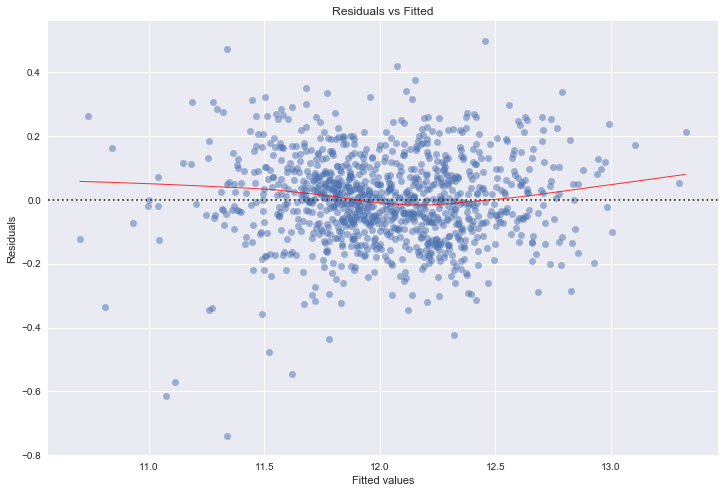

In [1119]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = model6.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'SalePrice', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

## 2. QQ Plot
This plot shows if residuals are normally distributed.This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

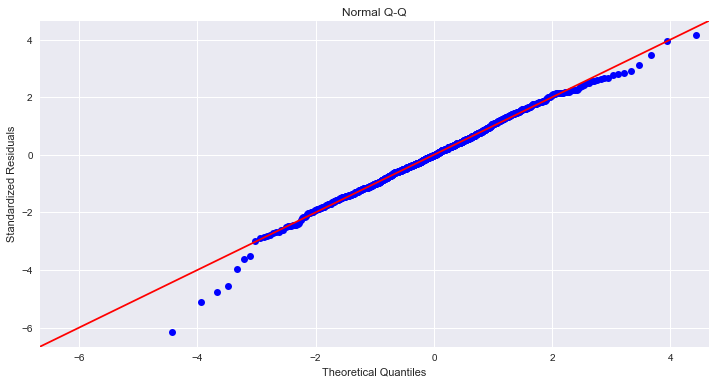

In [1129]:
res = model6.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

## 3. Scale-Location Plot
This is another residual plot, showing their spread, which you can use to assess heteroscedasticity.

It’s essentially a scatter plot of absolute square-rooted normalized residuals and fitted values, with a lowess regression line.

C:\Users\computer\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)


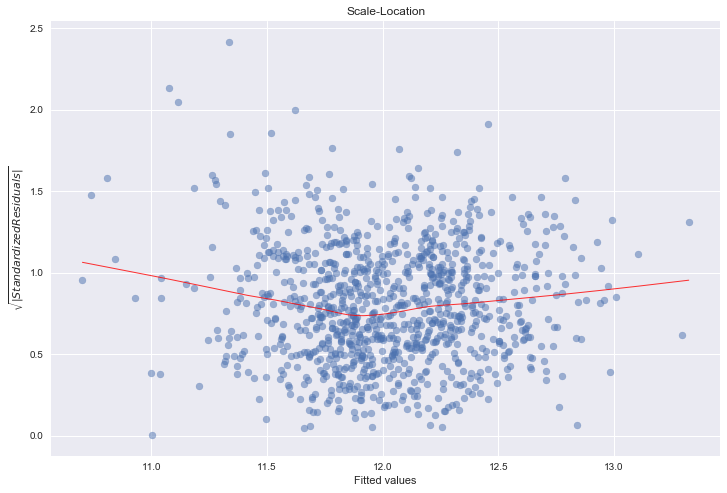

In [1133]:
# normalized residuals
model_norm_residuals = model6.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

## 4. Leverage plot
This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit.

In [ ]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

# cook's distance, from statsmodels internals
model_cooks = model6.get_influence().cooks_distance[0]

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [978]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model2_report,model3_report,model4_report,model5_report,model6_report])
clas_model

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958527,0.943989,0.464362
0,Linear Regression Model with Constant,0.958527,0.943989,0.167912
0,LRM after removing VIF above 100,0.957579,0.943383,0.172947
0,LRM after removing VIF above 10,0.921361,0.903147,0.179040
0,LRM after removing VIF above 5,0.897625,0.876009,0.187339
0,LRM after removing Insignificant Variables,0.881849,0.875765,0.178451


Occam’s Razor principles can be stated as “when presented with competing hypothetical answers to a problem, one should select the one that makes the fewest assumptions”. According to Occam's Razor principle we consider Linear Regression Model after removing insignificant variables with 0.88 R-Squared value and RMSE of 0.1784 to make the model perform better with new data as well.